# Import the Necessary Libraries

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import sys
import cv2

# Function to initialize the mean and vector images.

In [2]:
def initBackground (initImage):
    img_arr = mpimg.imread(initImage)
    mean = img_arr
    variance = 9*np.ones(img_arr.shape)
    return(mean,variance)
        

# Classify image into foreground and background pixels using a chebyshew in equality based classifier.

In [3]:
def ForegroundDetection (img_file, mean, variance, lmda):
    img = mpimg.imread(img_file)
    d = img - mean
    y = variance*(lmda**2)
    d_2 = np.square(d)
    I = d_2 - y
    mask = np.all(I>0 , axis =2)
    rI = 255*mask.astype (int)
    rI = rI.astype(np.uint8)
    return(rI)

# Reduce the image noise using a voting scheme.

In [4]:
def Voting (rI,eta,m,n):
    r,c = rI.shape
    cI = np.zeros((rI.shape[0], rI.shape[1]))
    for i in range (m,r-1-m):
        for j in range (n, r-1-n):
            img_patch = rI[i-m:i,j-n:j]
            y_unq, counts = np.unique (img_patch, return_counts = True)
            if len(counts) ==1 and y_unq[0]==1:
                cI[i,j] = 255
                if len(counts)>1:
                    if counts[1]>eta*m*n:
                        cI[i,j] = 255
    cI = cI.astype(np.uint8)
    return cI

# Update the mean and Variance images using a weighten average Scheme.

In [5]:
def meanvarUpdate (cI, img_path, M, V, alpha):
    img = mpimg.imread (img_path)
    mean_upd = np. zeros(img.shape)
    var_upd = np.zeros(img.shape)
    d = img - M
    d_2 = np.square(d)
    for i in range (cI.shape[0]):
        for j in range(cI.shape[1]):
            if cI[i,j] ==0:
                mean_upd[i,j,:] = (1-alpha)*M[i,j,:] + alpha*img[i,j,:]
                var_upd[i,j,:] = (1-alpha)*(V[i,j,:] + alpha*d_2[i,j,:])
                var_upd[i,j,:] = np.clip(var_upd[i,j,:], a_min = 9, a_max = None)
    return (mean_upd, var_upd)

In [6]:
def Background_Subtraction(img_dir, lmda, eta, m,n,alpha):
    
    img_file_name = os.listdir(img_dir)
    initImage = os.path.join(img_dir, img_file_name[0])
    mean, variance = initBackground (initImage)
    
    for i in range(1, len(img_file_name)):
        img_path = os.path.join(img_dir,img_file_name[i])
        
        fig, ax = plt.subplots(1,3,figsize=(10,10))
        rI = ForegroundDetection(img_path, mean, variance,lmda)
        ax[0].imshow(rI,cmap="gray")
        
        cI = Voting(rI,eta,m,n)
        mean, variance = meanvarUpdate(cI,img_path, mean, variance,alpha)
        ax[1].imshow(cI,cmap = "gray")
        
        img = mpimg.imread(img_path)  
        ax[2].imshow(img,cmap ="gray")
        
        plt.show()

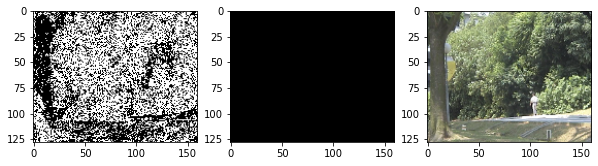

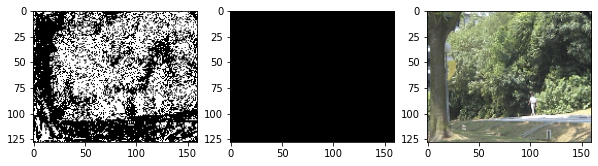

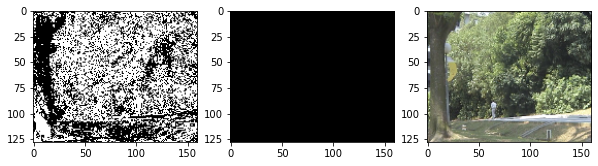

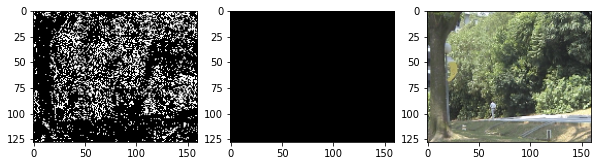

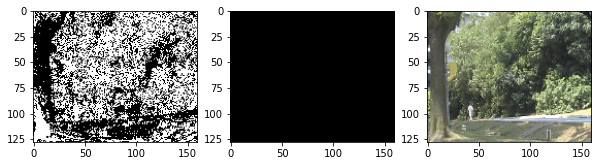

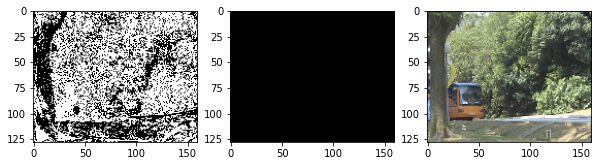

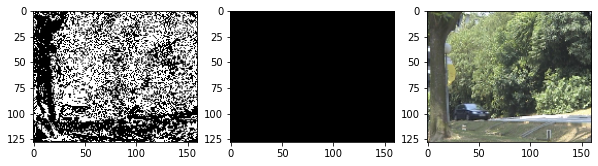

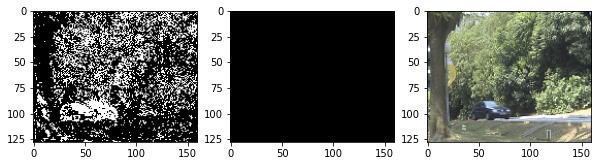

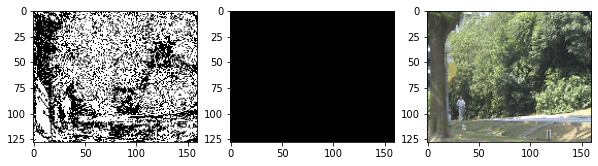

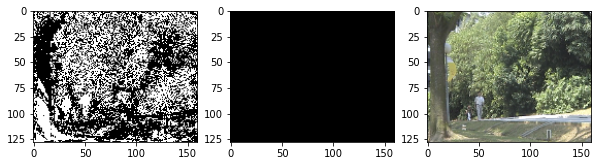

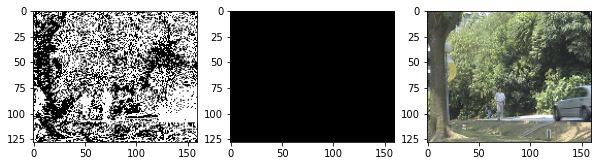

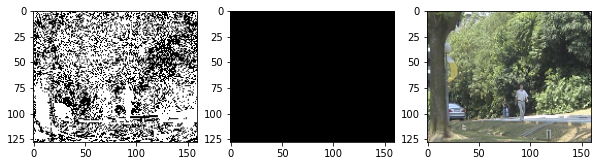

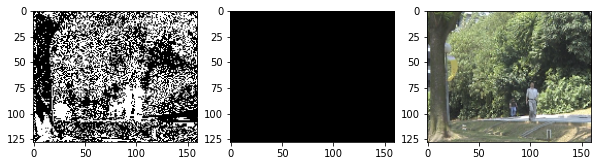

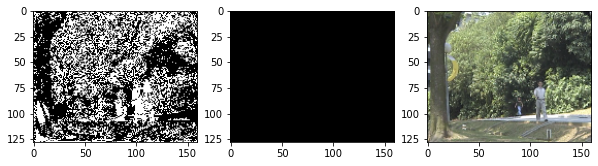

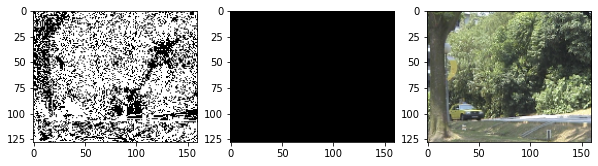

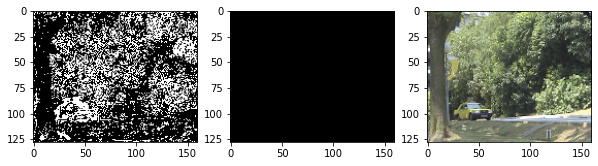

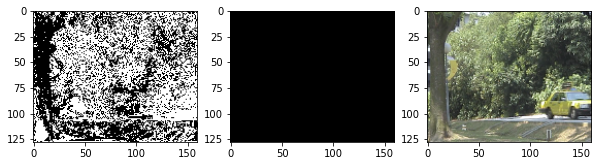

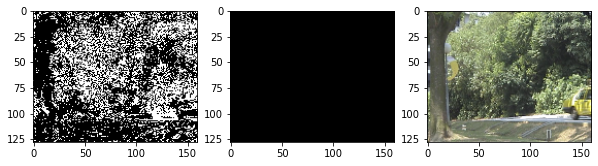

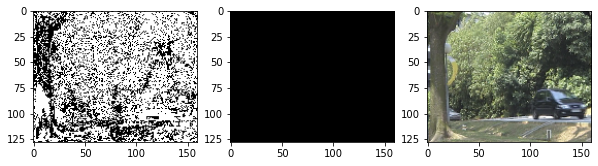

In [8]:
Background_Subtraction("E:\Data Set VOT\Tree", 0.8,0.7,8,8,0.8)